<a href="https://www.kaggle.com/code/aligreualihassan/house-price-prediction?scriptVersionId=125686195" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings

warnings.simplefilter('ignore')

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
data = pd.read_csv("/kaggle/input/housedata/data.csv")

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.shape

(4600, 18)

In [5]:
data.dtypes.value_counts()

int64      9
object     5
float64    4
dtype: int64

In [6]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
data.duplicated().sum()

0

# Linear Regression assuptions

In [8]:
print(data['price'].min() , data['price'].max())

data = data.query('price > 0')

0.0 26590000.0


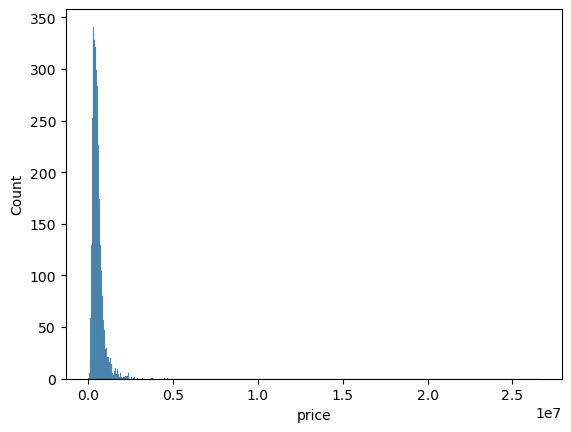

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=data, x='price')
plt.show()

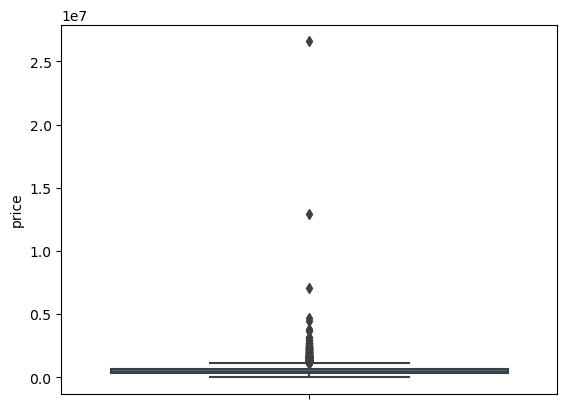

In [10]:
sns.boxplot(data=data , y='price')
plt.show()

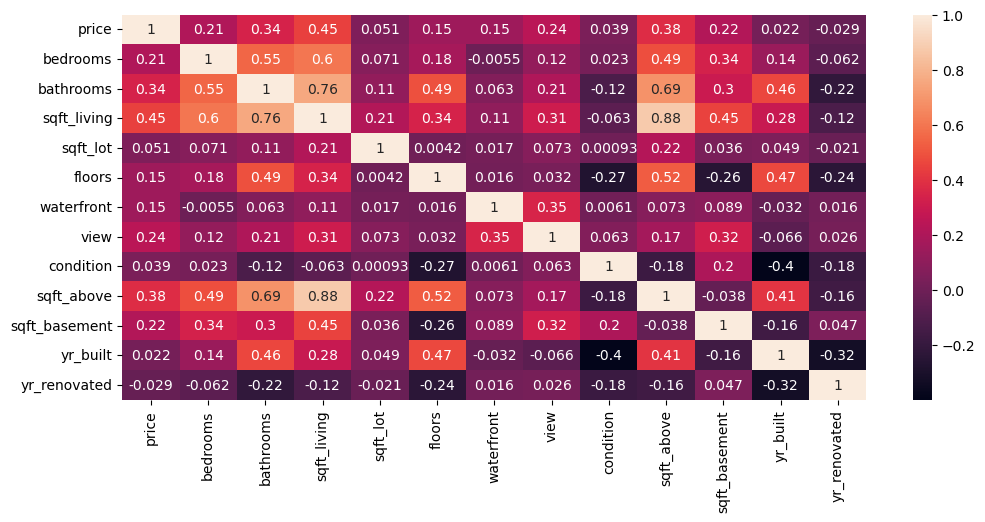

In [11]:
plt.figure(figsize=(12, 5))

correlation = data.corr()

sns.heatmap(correlation, annot=True)
plt.show()

In [12]:
# sns.pairplot(data)
# plt.show()

In [13]:
data.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [14]:
# sns.scatterplot(x=data.price, y = (data.sqft_living)**3)
# plt.show()

In [15]:
data = data.drop(['date', 'statezip', 'street', 'country'], axis=1)

In [16]:
features = data.drop('price', axis=1)
target = data.price.values

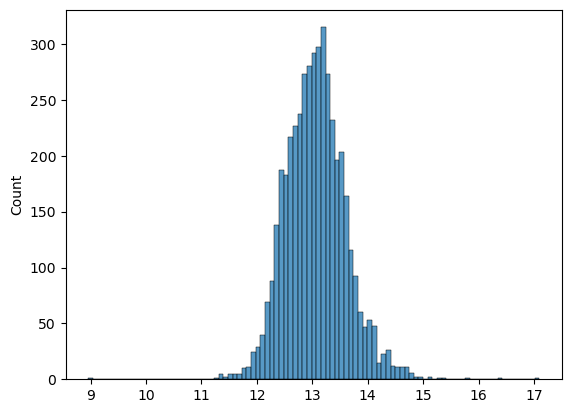

In [17]:
target_logged = np.log(target)

sns.histplot(target_logged)
plt.show()

In [18]:
features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [19]:
# features['bedrooms_ber_floor'] = features.bedrooms // features.floors
# features 

In [20]:
[data['city'].unique(), len(data['city'].unique())]

[array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
        'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
        'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
        'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
        'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
        'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
        'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
        'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
        'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
        'Preston', 'Milton'], dtype=object),
 44]

In [21]:
nums = features.select_dtypes('number')
text = features.select_dtypes('object')

In [22]:
nums.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [23]:
binary_columns = nums.iloc[:, [0,1,4,5,6,7,-2, -1]].reset_index(drop=True)

In [24]:
binary_columns['view'].unique()

array([0, 4, 1, 2, 3])

In [25]:
np.unique(data.bedrooms)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

cols = data.columns.to_list()
c_wanted = []

for c in cols:
    if c.startswith('s'):
        c_wanted.append(c)
        
poly_features = data[c_wanted]

scores = []

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(poly_features)
polyies = pd.DataFrame(poly_features, columns = poly.get_feature_names_out())

scaler = RobustScaler()
nums = scaler.fit_transform(polyies)

nums_scaled = pd.DataFrame(nums, columns = scaler.get_feature_names_out())
ohe_city = pd.get_dummies(text).reset_index(drop=True)
full_data = pd.concat([nums_scaled, ohe_city, binary_columns], axis=1)

X_train, X_test, y_train, y_test = train_test_split(full_data, target_logged, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
mean_absolute_error=  metrics.mean_absolute_error(model.predict(X_test), y_test)

In [27]:
print(mean_absolute_error)

print('-'*100)
measures = pd.DataFrame(np.column_stack((model.predict(X_test), y_test)), columns=['prediction', 'actual'])
measures['error'] = measures.iloc[:,0] - measures.iloc[:,1]
measures.head(10)

0.19227092010319663
----------------------------------------------------------------------------------------------------


,prediction,actual,error
0,14.139705,14.018451,0.121253
1,13.143437,13.115846,0.027590
2,13.266787,13.325304,-0.058517
3,12.394176,12.487485,-0.093310
4,13.290781,13.329378,-0.038597
5,12.998231,12.976181,0.022050
6,12.856536,12.628067,0.228469
7,12.675262,12.911642,-0.236381
8,13.008834,12.762827,0.246007
9,13.575769,13.639966,-0.064197
